# Part 1: Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [4]:
data.tail()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
1396,ADF1965,1795.0,59.83,1024.8460,111.99,10.00,493671.9863,149.0,18202.0,40730.0,2.0,NaN,NaN,Mango,Zintel,0.0
1397,ADF1967,203.0,6.77,1143.4972,19.84,13.75,261.9307,284.0,360.0,81341.0,3.0,NaN,NaN,Zintel,Zintel,0.0
1398,ADF1971,109.0,3.63,45.0900,0.00,0.00,658162.2734,20.0,240.0,3611.0,1.0,NaN,3G,Uxaa,Zintel,1.0
1399,ADF1982,904.0,30.13,161.1300,0.00,17.50,45187.7549,57.0,1728.0,10529.0,1.0,NaN,NaN,ToCall,Zintel,1.0
1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Row 1400 has too many Null values so we drop
data = data.drop(1400, axis = 0)

In [6]:
print("The longest tenure of a customer is",data['Customer tenure in month'].max(),"months")

The longest tenure of a customer is 181.7 months


In [7]:
print("The shortest tenure of a customer is",data['Customer tenure in month'].min(),"months")

The shortest tenure of a customer is -0.17 months


From the cell above we see that the column for "customer tenure" has negative values, so we filter out those rows and drop them

In [8]:
neg_net_age = data['Customer tenure in month'] < 0
data[neg_net_age]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
490,ADF0631,-5.0,-0.17,857.1008,63.47,190.03,1.565901e+06,204.0,716.0,1240.0,1.0,3G,3G,ToCall,ToCall,1.0
916,ADF1925,-4.0,-0.13,2898.8240,25.10,1.25,3.058533e+05,642.0,0.0,82221.0,1.0,3G,3G,Mango,Weematel,1.0
1163,ADF1623,-2.0,-0.07,130.5780,94.85,1.25,2.195300e+00,7.0,150.0,1121.0,1.0,Other,Other,Uxaa,Uxaa,1.0


In [9]:
data = data.drop([490,916,1163], axis = 0)

checking for negative values in our data

In [10]:
data.any() < 0

Customer ID                                    False
network_age                                    False
Customer tenure in month                       False
Total Spend in Months 1 and 2 of 2017          False
Total SMS Spend                                False
Total Data Spend                               False
Total Data Consumption                         False
Total Unique Calls                             False
Total Onnet spend                              False
Total Offnet spend                             False
Total Call centre complaint calls              False
Network type subscription in Month 1           False
Network type subscription in Month 2           False
Most Loved Competitor network in in Month 1    False
Most Loved Competitor network in in Month 2    False
Churn Status                                   False
dtype: bool

Checking Null values in the given Data

In [11]:
data.isnull().sum()

Customer ID                                      0
network_age                                      0
Customer tenure in month                         0
Total Spend in Months 1 and 2 of 2017            0
Total SMS Spend                                  0
Total Data Spend                                 0
Total Data Consumption                           0
Total Unique Calls                               0
Total Onnet spend                                0
Total Offnet spend                               0
Total Call centre complaint calls                0
Network type subscription in Month 1           175
Network type subscription in Month 2           144
Most Loved Competitor network in in Month 1      1
Most Loved Competitor network in in Month 2      1
Churn Status                                     0
dtype: int64

### Replaceing Null values in the given Data

In [12]:
#Getting the modal vales for each column with null values

print(data['Network type subscription in Month 1'].mode())
print(data['Network type subscription in Month 2'].mode())
print(data['Most Loved Competitor network in in Month 1'].mode())
print(data['Most Loved Competitor network in in Month 2'].mode())

0    3G
dtype: object
0    3G
dtype: object
0    PQza
dtype: object
0    Uxaa
dtype: object


In [13]:
#Replacing NaN With the model value
data['Network type subscription in Month 1'] = data['Network type subscription in Month 1'].fillna('3G')
data['Network type subscription in Month 2'] = data['Network type subscription in Month 2'].fillna('3G')
data['Most Loved Competitor network in in Month 1'] = data['Most Loved Competitor network in in Month 1'].fillna('PQza')
data['Most Loved Competitor network in in Month 2'] = data['Most Loved Competitor network in in Month 2'].fillna('Uxaa')

In [14]:
data.groupby(['Network type subscription in Month 2','Churn Status'])['Churn Status'].count()

Network type subscription in Month 2  Churn Status
2G                                    0.0             138
                                      1.0             146
3G                                    0.0             443
                                      1.0             386
Other                                 0.0             119
                                      1.0             165
Name: Churn Status, dtype: int64

## How many churned?

From the bar chart above we see that Approximately Half the number of customers churned

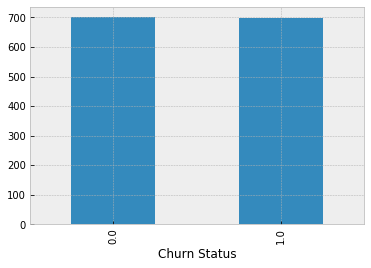

In [34]:
churned = data.groupby(['Churn Status']).size()
churned.plot(kind = "bar")

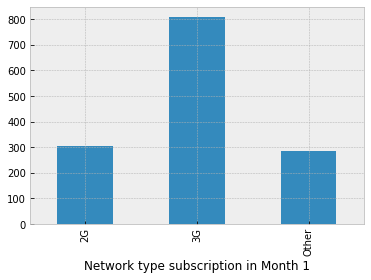

In [38]:
net_type1 = data.groupby("Network type subscription in Month 1").size()
net_type1.plot('bar')

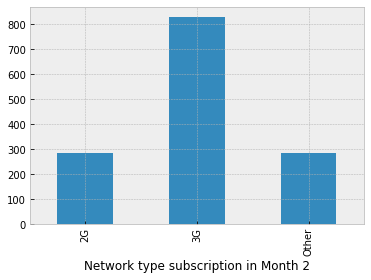

In [39]:
net_type2 = data.groupby("Network type subscription in Month 2").size()
net_type2.plot('bar')

In the second month majority of the customers subscribed to the "3G" network type

In [42]:
complains_plt = data.groupby(data['Total Call centre complaint calls']).size()
complains_plt

Total Call centre complaint calls
1.0     894
2.0     268
3.0      92
4.0      50
5.0      24
6.0      20
7.0      10
8.0       9
9.0       5
10.0      4
11.0      7
12.0      3
13.0      3
14.0      2
15.0      1
16.0      2
18.0      1
21.0      1
49.0      1
dtype: int64

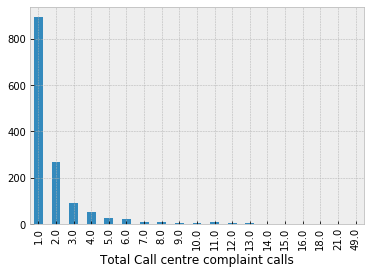

In [41]:
complains_plt.plot(kind = 'bar')
plt.show()


In [19]:
print('The highest number of Call center complaint calls is',data['Total Call centre complaint calls'].max())
print('The lowest number of Call center complaint calls is',data['Total Call centre complaint calls'].min())

The highest number of Call center complaint calls is 49.0
The lowest number of Call center complaint calls is 1.0


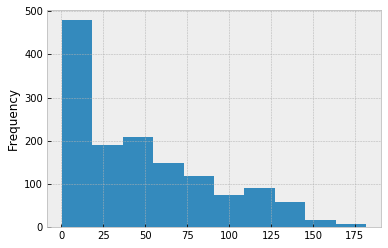

In [20]:
data['Customer tenure in month'].plot(kind = 'hist')

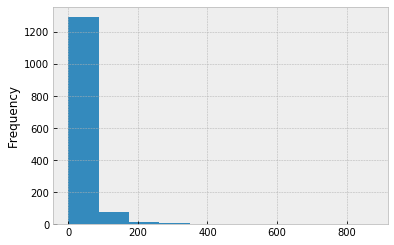

In [21]:
data['Total SMS Spend'].plot(kind = 'hist')

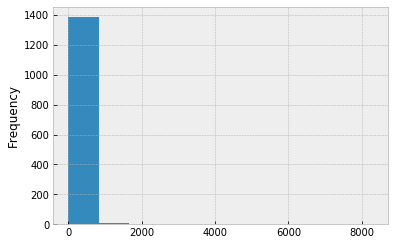

In [22]:
data['Total Data Spend'].plot(kind = 'hist')

majority of the customers spent between 0 to 1000 naira on data

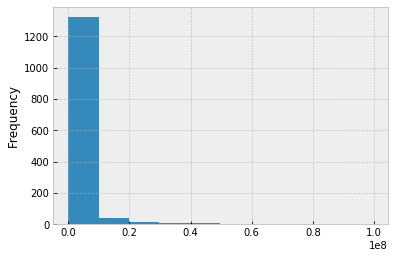

In [23]:
data['Total Data Consumption'].plot(kind = 'hist')

Majority of the customers used between 0 to 1 x 10^7 kb within 2 months 

In [24]:
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [25]:
data['Total Unique Calls'].max()

2596.0

In [26]:
data['Total Unique Calls'].mode()

0    2.0
dtype: float64

In [27]:
data.shape

(1397, 16)